In [31]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [32]:
from helpers import load_data

# load dataset
x, y = load_data()

In [44]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [51]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""

    k_fold = k_indices.shape[0]
    te_indice = k_indices[k]
    tr_indice = k_indices[~(np.arange(k_fold) == k)]
    tr_indice = tr_indice.reshape(-1)
    x_test = x[te_indice]
    y_test = y[te_indice]
    x_train = x[tr_indice]
    y_train = y[tr_indice]
    
    x_train_poly = build_poly(x_train,degree)
    x_test_poly = build_poly(x_test,degree)

    w = ridge_regression(y_train,x_train_poly,lambda_)

    loss_tr = np.sqrt(2*compute_mse(y_train,x_train_poly,w))
    loss_te = np.sqrt(2*compute_mse(y_test,x_test_poly,w))
    return loss_tr, loss_te

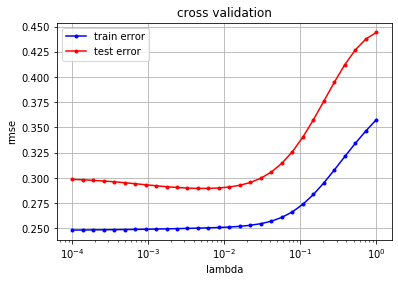

In [53]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []

    
    for lambda_ in lambdas:
        avg_loss_tr = 0.0
        avg_loss_te = 0.0
        for k in range(k_fold):
            #compute the loss of train set and test set
            loss_tr,loss_te = cross_validation(y, x, k_indices, k, lambda_, degree)
            avg_loss_tr = avg_loss_tr + loss_tr
            avg_loss_te = avg_loss_te + loss_te
        
        avg_loss_tr = avg_loss_tr/4
        avg_loss_te = avg_loss_te/4
        rmse_tr.append(avg_loss_tr)
        rmse_te.append(avg_loss_te) 
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

In [ ]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split data with a specific seed: TODO
        # ***************************************************
        raise NotImplementedError
        # ***************************************************
        # INSERT YOUR CODE HERE
        # bias_variance_decomposition: TODO
        # ***************************************************
        raise NotImplementedError

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()